<a href="https://colab.research.google.com/github/Alessandro5C/3D-ORGAN/blob/master/view_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!tar -xvzf datasets/chairnet.tar.gz -C datasets/

chairnet.npy


# Train

In [2]:
#! ./run_experiments.sh

"." no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
#!python -m reconstruction -d chairnet -o data/chair_shapenet --epochs 400 --opt voxels-usegan --overwrite -f

^C


# Results

* Model: voxels-usegan

In [5]:
import numpy as np
import pandas as pd
from reconstruction.model import LoadModel
from reconstruction.utils.plot import plot_vol, plot_reconstruction
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
# Load model
model = LoadModel('chairnet', 'data/chair_shapenet/', opt='voxels-usegan', evaluate_mode=True)
# Load data
model._load_full_test_set()
voxels, voxels_target, labels = model.full_test_data

Found 'data/chair_shapenet/training_log.csv'
Found 'data/chair_shapenet/model_generator.h5'
Found 'data/chair_shapenet/model_discriminator.h5'


c:\Users\aldav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



# .


not really working

In [16]:
results_1 = model.predict(voxels, labels)
results_2 = model.predict(results_1, labels)

def maskedl1(target, incomplete, result):
    incomplete = incomplete.reshape(-1)
    target = target.reshape(-1)[incomplete == -1]
    result = result.reshape(-1)[incomplete == -1]
    l1 = np.abs(target - result)
    return np.mean(l1)

Loading models...
18/18 [==============================] - 332s 18s/step


In [ ]:
result_df = pd.DataFrame(columns=['label', 'input_l1', 'result_l1', 'result2_l1'])

for lbl in np.unique(labels):
    lbl_txt = model.label_encoder.inverse_transform([lbl])
    t_voxels, t_voxels_target = voxels[labels == lbl], voxels_target[labels == lbl]
    t_results_1, t_results_2 = results_1[labels == lbl], results_2[labels == lbl]
    l1_input = maskedl1(t_voxels_target, t_voxels, t_voxels)
    l1_it1 = maskedl1(t_voxels_target, t_voxels, t_results_1)
    l1_it2 = maskedl1(t_voxels_target, t_voxels, t_results_2)
    result_df.at[lbl, 'label'] = lbl_txt
    result_df.at[lbl, 'input_l1'] = l1_input
    result_df.at[lbl, 'result_l1'] = l1_it1
    result_df.at[lbl, 'result2_l1'] = l1_it2

result_df

,label,input_l1,result_l1,result2_l1
0,[1006be65e7bc937e9141f9b58470d646],0.023619,1.126571,1.091189
1,[1007e20d5e811b308351982a6e40cf41],0.013119,1.127385,1.092027
2,[100b18376b885f206ae9ad7e32c4139d],0.020119,1.133156,1.098341
3,[1013f70851210a618f2e765c4a8ed3d],0.037769,1.125709,1.100768
4,[1015e71a0d21b127de03ab2a27ba7531],0.016171,1.12597,1.085037
...,...,...,...,...
95,[13076ebf8b5cc457b8d6f69a14683de3],0.007794,1.129573,1.090935
96,[131abb0b13d6c5b97f0b1e4f6d35b0ba],0.014099,1.130437,1.10741
97,[131edf0948b60ee6372c8cd7d07d8ddc],0.025693,1.132273,1.098459
98,[13990109140043c919fb4103277a6b93],0.013049,1.135406,1.116381


In [ ]:
results = pd.DataFrame()
for lbl in np.unique(labels):
    t_input = voxels[labels == lbl]
    t_target = voxels_target[labels == lbl]
    t_labels = labels[labels == lbl]
    t_result = model.predict(t_input, t_labels)
#     t_result = model.predict(t, t_labels)
    l1 = np.mean(np.abs(t_target - t_result))
    l1_original = np.mean(np.abs(t_target - t_input))
    print(model.label_encoder.inverse_transform([lbl])[0] + ': %.4f (%.4f)' % (l1, l1_original))

1/1 [==============================] - 0s 331ms/step
1006be65e7bc937e9141f9b58470d646: 1.0801 (0.0226)
1/1 [==============================] - 0s 31ms/step
1007e20d5e811b308351982a6e40cf41: 1.0726 (0.0125)
1/1 [==============================] - 0s 32ms/step
100b18376b885f206ae9ad7e32c4139d: 1.0743 (0.0191)
1/1 [==============================] - 0s 29ms/step
1013f70851210a618f2e765c4a8ed3d: 1.0451 (0.0351)
1/1 [==============================] - 0s 37ms/step
1015e71a0d21b127de03ab2a27ba7531: 1.0922 (0.0157)
1/1 [==============================] - 0s 32ms/step
1016f4debe988507589aae130c1f06fb: 1.0858 (0.0147)
1/1 [==============================] - 0s 29ms/step
1022fe7dd03f6a4d4d5ad9f13ac9f4e7: 1.0666 (0.0139)
1/1 [==============================] - 0s 26ms/step
1028b32dc1873c2afe26a3ac360dbd4: 1.0795 (0.0114)
1/1 [==============================] - 0s 29ms/step
1031fc859dc3177a2f84cb7932f866fd: 1.0593 (0.0301)
1/1 [==============================] - 0s 32ms/step
1033ee86cc8bac4390962e4fb7072b8

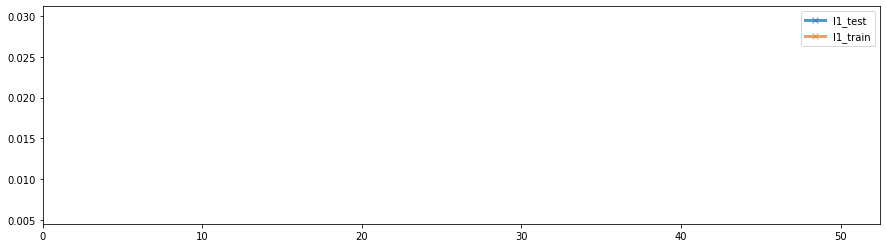

L1 loss per category (test dataset):
1/1 [==============================] - 0s 74ms/step
1006be65e7bc937e9141f9b58470d646: 1.0801 (0.0226)
1/1 [==============================] - 0s 34ms/step
1007e20d5e811b308351982a6e40cf41: 1.0726 (0.0125)
1/1 [==============================] - 0s 37ms/step
100b18376b885f206ae9ad7e32c4139d: 1.0743 (0.0191)
1/1 [==============================] - 0s 34ms/step
1013f70851210a618f2e765c4a8ed3d: 1.0451 (0.0351)
1/1 [==============================] - 0s 37ms/step
1015e71a0d21b127de03ab2a27ba7531: 1.0922 (0.0157)
1/1 [==============================] - 0s 42ms/step
1016f4debe988507589aae130c1f06fb: 1.0858 (0.0147)
1/1 [==============================] - 0s 37ms/step
1022fe7dd03f6a4d4d5ad9f13ac9f4e7: 1.0666 (0.0139)
1/1 [==============================] - 0s 42ms/step
1028b32dc1873c2afe26a3ac360dbd4: 1.0795 (0.0114)
1/1 [==============================] - 0s 39ms/step
1031fc859dc3177a2f84cb7932f866fd: 1.0593 (0.0301)
1/1 [==============================] - 0s 36ms/

In [ ]:
train_log = pd.read_csv(model.training_log_file)
plt.figure(figsize=(15,4))
plt.plot(train_log.epoch, train_log.l1_loss_test, '-x', label='l1_test', linewidth=3, alpha=.75)
plt.plot(train_log.epoch, train_log.l1_loss_train, '-x', label='l1_train', linewidth=3, alpha=.75)
plt.ylim(0.0045, 0.0312)
plt.xlim(0)
plt.legend()
plt.show()

print('L1 loss per category (test dataset):')

results = pd.DataFrame()
for lbl in np.unique(labels):
    t_input = voxels[labels == lbl]
    t_target = voxels_target[labels == lbl]
    t_labels = labels[labels == lbl]
    t_result = model.predict(t_input, t_labels)
#     t_result = model.predict(t, t_labels)
    l1 = np.mean(np.abs(t_target - t_result))
    l1_original = np.mean(np.abs(t_target - t_input))
    print(model.label_encoder.inverse_transform([lbl])[0] + ': %.4f (%.4f)' % (l1, l1_original))


In [ ]:
model._evaluate(model.full_test_data)

4/4 [==============================] - 1s 136ms/step


1.1171858

In [ ]:
print(model.label_encoder.classes_)

['1006be65e7bc937e9141f9b58470d646' '1007e20d5e811b308351982a6e40cf41'
 '100b18376b885f206ae9ad7e32c4139d' '1013f70851210a618f2e765c4a8ed3d'
 '1015e71a0d21b127de03ab2a27ba7531' '1016f4debe988507589aae130c1f06fb'
 '1022fe7dd03f6a4d4d5ad9f13ac9f4e7' '1028b32dc1873c2afe26a3ac360dbd4'
 '1031fc859dc3177a2f84cb7932f866fd' '1033ee86cc8bac4390962e4fb7072b86'
 '103a0a413d4c3353a723872ad91e4ed1' '103a60f3b09107df2da1314e036b435e'
 '103b75dfd146976563ed57e35c972b4b' '103c31671f8c0b1467bb14b25f99796e'
 '103d77d63f0d68a044e6721e9db29c1b' '104256e5bb73b0b719fb4103277a6b93'
 '1049953406c81b237eaeab1f0c9120b7' '1055f78d441d170c4f3443b22038d340'
 '1063d4fcd366de4060e37b3f76995f8b' '106a0dbaead5066519fb4103277a6b93'
 '106c7f10c5bf5bd5f51f77a6d7299806' '106e9487a1d47ff1a09cb462b3e723e2'
 '10709332176024ce9e47e7a22e24daa3' '1079635b3da12a812cee4bf5d0f11ffe'
 '107caefdad02cf1c8ab8e68cb52baa6a' '107ed94869ed6f1be13496cd332ce78f'
 '108238b535eb293cd79b19c7c4f0e293' '108b9cb292fd811cf51f77a6d7299806'
 '1093d3

1/1 [==============================] - 0s 34ms/step


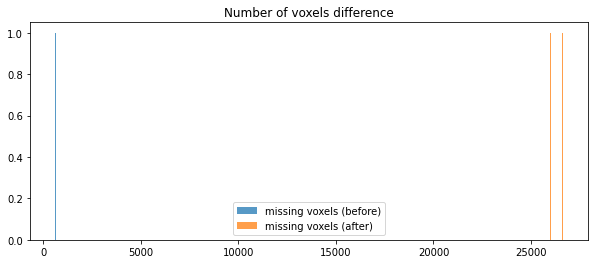

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



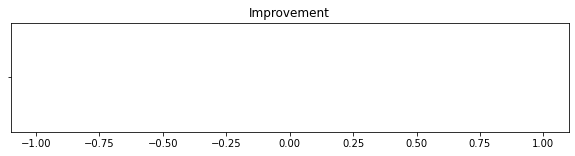

In [ ]:
lbl = model.label_encoder.transform(['1006be65e7bc937e9141f9b58470d646'])[0]
arq_voxels = voxels[labels == lbl]
arq_voxels_target = voxels_target[labels == lbl]
arq_labels = labels[labels == lbl]
arq_result = model.predict(arq_voxels, arq_labels)
# Voxels original difference
voxels_diff = np.logical_xor(arq_voxels_target > 0, arq_voxels > 0)
voxels_diff = voxels_diff.reshape([arq_voxels.shape[0], -1])
voxels_diff = np.sum(voxels_diff, 1)
# Voxels result difference
voxels_result_diff = np.logical_xor(arq_voxels_target > 0, arq_result > 0)
voxels_result_diff = voxels_result_diff.reshape([arq_result.shape[0], -1])
voxels_result_diff = np.sum(voxels_result_diff, 1)
plt.figure(figsize=(10,4))
plt.hist(voxels_diff, bins=20, alpha=.75, label='missing voxels (before)')
plt.hist(voxels_result_diff, bins=20, alpha=.75, label='missing voxels (after)')
plt.title('Number of voxels difference')
plt.legend()
plt.show()
# Show improvement
improvement = (voxels_diff - voxels_result_diff) / voxels_diff
plt.figure(figsize=(10,2))
sns.boxplot(improvement, palette='Set3', linewidth=1, )
plt.title('Improvement')
plt.xlim(-1.1,1.1);

# SHOWING RESULTS

In [47]:
sample_name = "1006be65e7bc937e9141f9b58470d646"
#sample_name = "a63ceaceaaae4af9753496ba23f2183"

In [100]:
# n_points = 3
# radius = 8
# model._load_full_test_set(min_points=n_points, max_points=n_points,
#                           min_radius=radius, max_radius=radius)
model._load_full_test_set(min_points=2, max_points=5,
                          min_radius=6, max_radius=10, sphere_chance=.9)
voxels, voxels_target, labels = model.full_test_data
result = model.predict(voxels, labels)

arq_voxels, arq_voxels_target, arq_labels, arq_result = voxels, voxels_target, labels, result

c:\Users\aldav\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning:

Trying to unpickle estimator LabelEncoder from version 1.0.2 when using version 1.1.3. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



4/4 [==============================] - 37s 9s/step


# ...

In [117]:
l1loss = lambda a, b: np.mean(np.abs(a.astype(np.float32) - b.astype(np.float32)))
n = arq_voxels.shape[0]

# Uncomment the desire choice
i = 1

print('Complete object:')
plot_vol(arq_voxels_target[i])
n_voxels_target = np.sum(arq_voxels_target[i] == 1)

size = 10
print('Fractured object (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_voxels[i]))
n_voxels = np.sum(arq_voxels[i] == 1)
missing_points = n_voxels_target - n_voxels
perc_missing = missing_points * 100 / n_voxels_target
print(f'Missing voxels: {missing_points} (%.2f%%)' % perc_missing)
plot_vol(arq_voxels[i], s=size)

print('Reconstruction (l1=%.4f):' % l1loss(arq_voxels_target[i], arq_result5[i]))
missing_points_result = np.sum((arq_voxels_target[i] + (arq_result5[i] > 0)) == 0)
extra_points = np.sum((arq_voxels_target[i] + (arq_result5[i] > 0)) == 1)
print(f'Missing voxels    : {missing_points} -> {missing_points_result}')
print(f'Extra voxels added: {extra_points}')
plot_reconstruction(arq_voxels[i], arq_result5[i], s=size)
plot_reconstruction(arq_voxels[i], arq_voxels_target[i], s=size)

Complete object:


Fractured object (l1=1.0122):
Missing voxels: 1228 (59.76%)


Reconstruction (l1=0.0127):
Missing voxels    : 1228 -> 30713
Extra voxels added: 2055
